In [1]:
#Instalaciones básicas
import pandas as pd
import sys
sys.path.append("..")
from src import soporte as sp
import re

#Instalaciones de visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Abrimos el archivo limpio
df = pd.read_csv("../data/data_a_analizar.csv", parse_dates=['last_scraped'])

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id,last_scraped,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,kitchen,tv,air_conditioning,pets_allowed,dryer,patio_or_balcony,iron,microwave,cooking_basics,self_check-in,washer,heating,hair_dryer,wifi,coffee_maker,elevator,pool,price_person,trimestre,review_scores_rating_iterative,review_scores_accuracy_iterative,review_scores_cleanliness_iterative,review_scores_checkin_iterative,review_scores_communication_iterative,review_scores_location_iterative,review_scores_value_iterative
0,21853,2025-03-11,cármenes,private room in rental unit,1,1.0,1.0,1.0,29,4,33,True,True,True,False,False,False,True,True,True,False,True,True,True,True,True,True,False,29.000000,2025Q1,4.58,4.72,4.56,4.75,4.82,4.21,4.67
1,62423,2025-03-12,justicia,private room in rental unit,4,1.5,1.0,2.0,77,1,227,True,False,False,True,True,False,True,False,True,False,True,True,True,False,False,False,False,19.250000,2025Q1,4.64,4.78,4.43,4.80,4.85,4.97,4.58
2,70059,2025-03-06,universidad,entire rental unit,2,1.0,1.0,1.0,66,15,61,True,True,False,False,False,False,True,True,True,False,True,True,True,True,True,True,False,33.000000,2025Q1,4.68,4.75,4.75,4.85,4.90,4.95,4.53
3,70310,2025-03-06,universidad,entire rental unit,2,1.0,1.0,2.0,89,30,29,True,False,False,False,False,False,True,True,True,False,False,True,True,True,True,False,False,44.500000,2025Q1,4.36,4.62,4.52,4.82,4.69,4.86,4.11
4,72150,2025-03-12,embajadores,entire rental unit,6,1.0,3.0,5.0,173,3,126,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,28.833333,2025Q1,4.61,4.62,4.40,4.86,4.85,4.85,4.47


# Calculamos KPIS

In [4]:
#Número de propietarios únicos
df['id'].nunique()

30275

In [5]:
#Por trimestre

# Crear una columna de trimestre
df['trimestre'] = df['last_scraped'].dt.to_period('Q')

# Agrupar por trimestre y contar IDs únicos
ids_unicos_por_trimestre = df.groupby('trimestre')['id'].nunique().reset_index(name='ids_unicos')

# Mostrar el resultado
print(ids_unicos_por_trimestre)

  trimestre  ids_unicos
0    2024Q2       21620
1    2024Q3       21068
2    2024Q4       20815
3    2025Q1       19274


In [6]:
df.groupby('trimestre')['price_person'].mean().round(2)


trimestre
2024Q2    46.29
2024Q3    47.16
2024Q4    45.57
2025Q1    45.40
Freq: Q-DEC, Name: price_person, dtype: float64

In [7]:
# Calcular distribución porcentual por tipo de propiedad
distribucion_tipo_propiedad = (
    df['property_type']
    .value_counts(normalize=True)  # proporción
    .mul(100)                      # convertir a %
    .round(2)                      # redondear a 2 decimales
    .reset_index()
    .rename(columns={'index': 'property_type', 'property_type': 'porcentaje'})
)

print("Distribución por tipo de propiedad (%):")
print(distribucion_tipo_propiedad)


Distribución por tipo de propiedad (%):
                     porcentaje  proportion
0            entire rental unit       62.21
1   private room in rental unit       21.04
2          private room in home        2.73
3                  entire condo        2.41
4                   entire loft        2.13
..                          ...         ...
62           shared room in hut        0.00
63    shared room in aparthotel        0.00
64         private room in tent        0.00
65                entire hostel        0.00
66               entire cottage        0.00

[67 rows x 2 columns]


In [8]:
promedios = df[['beds', 'bedrooms', 'bathrooms']].mean().round(2)

print("\nPromedio por alojamiento:")
print(promedios)



Promedio por alojamiento:
beds         1.93
bedrooms     1.39
bathrooms    1.30
dtype: float64


In [9]:
precio_medio_persona = df['price_person'].mean().round(2)
print(f"Precio medio por persona: {precio_medio_persona} €")


Precio medio por persona: 46.12 €


In [10]:
top10_barrios_precio = (
    df.groupby('neighbourhood_cleansed')['price_person']
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print("\nTop 10 barrios con mayor precio medio por persona:")
print(top10_barrios_precio)



Top 10 barrios con mayor precio medio por persona:
  neighbourhood_cleansed  price_person
0              el goloso        123.03
1            castillejos        108.14
2        palomeras bajas         98.67
3                amposta         95.32
4               imperial         93.73
5               portazgo         87.65
6                legazpi         77.57
7                  rosas         70.44
8               salvador         68.87
9           vallehermoso         67.62


In [11]:
relacion_calidad_precio = df['review_scores_value_iterative'].mean().round(2)
print(f"\nRelación calidad-precio media: {relacion_calidad_precio}")



Relación calidad-precio media: 4.56


In [12]:
puntuacion_media_general = df['review_scores_rating_iterative'].mean().round(2)
print(f"Puntuación media general: {puntuacion_media_general}")


Puntuación media general: 4.65


In [13]:
# Seleccionar las subpuntuaciones relevantes
subpuntuaciones_cols = [
    'review_scores_accuracy_iterative',
    'review_scores_cleanliness_iterative',
    'review_scores_checkin_iterative',
    'review_scores_communication_iterative',
    'review_scores_location_iterative',
    'review_scores_value_iterative'
]

# Calcular la media de cada subpuntuación
subpuntuaciones_media = df[subpuntuaciones_cols].mean().round(2)

# Ordenar de mejor a peor valoradas
subpuntuaciones_ordenadas = subpuntuaciones_media.sort_values(ascending=False)

print("\nSubpuntuaciones de los alojamientos (de mejor a peor valoradas):")
print(subpuntuaciones_ordenadas)



Subpuntuaciones de los alojamientos (de mejor a peor valoradas):
review_scores_communication_iterative    4.76
review_scores_checkin_iterative          4.75
review_scores_location_iterative         4.75
review_scores_accuracy_iterative         4.70
review_scores_cleanliness_iterative      4.69
review_scores_value_iterative            4.56
dtype: float64


In [14]:
total = df.shape[0]
con_mas_45 = df[df['review_scores_rating_iterative'] > 4.5].shape[0]
porcentaje_superior_45 = round((con_mas_45 / total) * 100, 2)

print(f"\n% de alojamientos con puntuación general > 4.5: {porcentaje_superior_45}%")



% de alojamientos con puntuación general > 4.5: 81.68%


In [15]:
alojamientos_por_barrio = (
    df['neighbourhood_cleansed']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'barrio', 'neighbourhood_cleansed': 'numero_alojamientos'})
)

print("Número de alojamientos por barrio:")
print(alojamientos_por_barrio)


Número de alojamientos por barrio:
    numero_alojamientos  count
0           embajadores   9239
1           universidad   7411
2               palacio   6023
3                   sol   4780
4              justicia   4225
..                  ...    ...
123          valdemarín     28
124       fuentelareina     19
125            el pardo     12
126             horcajo      6
127             atalaya      4

[128 rows x 2 columns]


In [16]:
barrios_mejor_valorados = (
    df.groupby('neighbourhood_cleansed')['review_scores_rating_iterative']
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'review_scores_rating_iterative': 'puntuacion_media'})
)

print("\nBarrios mejor valorados (por puntuación media):")
print(barrios_mejor_valorados)



Barrios mejor valorados (por puntuación media):
    neighbourhood_cleansed  puntuacion_media
0                  horcajo              4.86
1                  palomas              4.85
2              media legua              4.83
3                 salvador              4.81
4         alameda de osuna              4.80
..                     ...               ...
123                adelfas              4.55
124              vinateros              4.55
125             valdemarín              4.53
126              orcasitas              4.49
127           vallehermoso              4.46

[128 rows x 2 columns]


In [17]:
# Seleccionar las columnas de comodidades
comodidades_clave = ['air_conditioning', 'kitchen', 'washer']

# Calcular el % de alojamientos que tienen cada una
porcentaje_comodidades = (df[comodidades_clave].mean() * 100).round(2)

print("Porcentaje de alojamientos con cada comodidad:")
print(porcentaje_comodidades)


Porcentaje de alojamientos con cada comodidad:
air_conditioning    53.93
kitchen             90.55
washer              61.33
dtype: float64


In [18]:
# Filtrar todas las columnas booleanas
columnas_booleanas = df.select_dtypes(include='bool').columns

# Calcular el porcentaje de presencia de cada comodidad
ranking_comodidades = (df[columnas_booleanas].mean() * 100).round(2).sort_values(ascending=False)

print("\nRanking de comodidades más comunes (% de alojamientos que las tienen):")
print(ranking_comodidades)



Ranking de comodidades más comunes (% de alojamientos que las tienen):
wifi                91.57
kitchen             90.55
hair_dryer          72.89
iron                70.63
microwave           67.70
cooking_basics      66.28
tv                  63.91
washer              61.33
heating             57.73
air_conditioning    53.93
coffee_maker        44.58
elevator            43.34
self_check-in       28.52
pets_allowed        16.85
dryer                9.64
patio_or_balcony     9.47
pool                 2.37
dtype: float64


In [19]:
tasa_ocupacion = 0.7
dias_mes = 30

df['ingreso_potencial'] = df['price_person'] * df['beds'] * tasa_ocupacion * dias_mes

# Ver primeros resultados
print("Ingresos potenciales por alojamiento (primeros 5):")
print(df[['id', 'price_person', 'beds', 'ingreso_potencial']].head())


Ingresos potenciales por alojamiento (primeros 5):
      id  price_person  beds  ingreso_potencial
0  21853     29.000000   1.0              609.0
1  62423     19.250000   2.0              808.5
2  70059     33.000000   1.0              693.0
3  70310     44.500000   2.0             1869.0
4  72150     28.833333   5.0             3027.5


In [20]:
services = [
    "kitchen", "tv", "air_conditioning", "pets_allowed", "dryer", "patio_or_balcony",
    "iron", "microwave", "cooking_basics", "shared_hot_tub", "self_check-in",
    "washer", "heating", "hair_dryer", "wifi", "coffee_maker",  "elevator",'pool'
]

Omitida: 'shared_hot_tub' no existe o no es booleana.


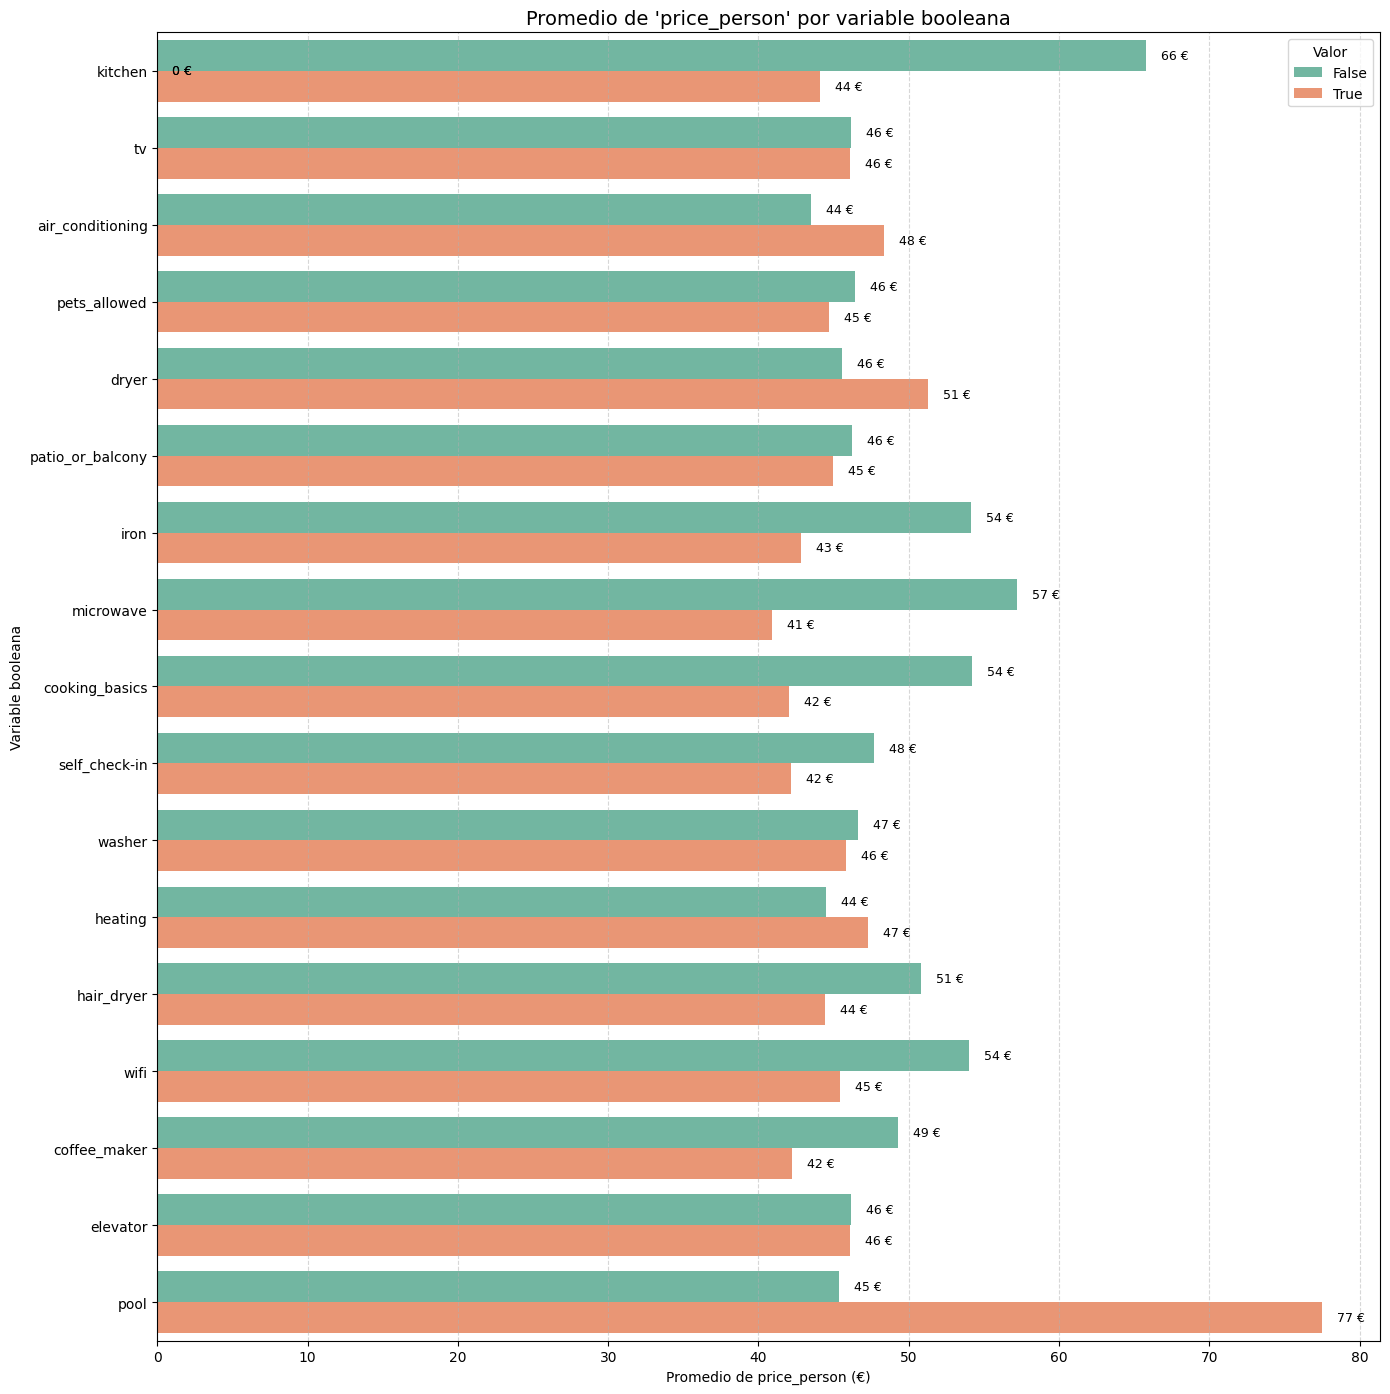

In [21]:
sp.plot_boolean_vars_impact(df,services)

In [22]:
sp.boolean_summary_table(df, services)

,Variable,True (n),True (%),False (n),False (%),Promedio True (€),Promedio False (€)
0,kitchen,74953,90.5,7824,9.5,44.08,65.76
1,tv,52904,63.9,29873,36.1,46.12,46.13
2,air_conditioning,44645,53.9,38132,46.1,48.33,43.52
3,pets_allowed,13949,16.9,68828,83.1,44.71,46.41
4,dryer,7978,9.6,74799,90.4,51.30,45.57
5,patio_or_balcony,7842,9.5,74935,90.5,44.93,46.25
6,iron,58464,70.6,24313,29.4,42.83,54.12
7,microwave,56039,67.7,26738,32.3,40.88,57.18
8,cooking_basics,54865,66.3,27912,33.7,42.02,54.24
9,self_check-in,23604,28.5,59173,71.5,42.14,47.72


In [23]:
scores = [
    'review_scores_communication_iterative',
    'review_scores_checkin_iterative',
    'review_scores_location_iterative',
    'review_scores_accuracy_iterative',
    'review_scores_cleanliness_iterative',
    'review_scores_value_iterative'
]


In [24]:
correlaciones = df[scores + ['price_person']].corr()
correlacion_con_precio = correlaciones['price_person'].drop('price_person').sort_values(ascending=False)

print("Correlación de cada variable con price_person:\n")
print(correlacion_con_precio)


Correlación de cada variable con price_person:

review_scores_location_iterative         0.026672
review_scores_cleanliness_iterative      0.009220
review_scores_accuracy_iterative         0.002047
review_scores_communication_iterative    0.000869
review_scores_checkin_iterative          0.000651
review_scores_value_iterative            0.000506
Name: price_person, dtype: float64


In [25]:
# Generamos columnas categóricas de las reviews

# Definir los intervalos y las etiquetas
bins = [0, 1, 2, 3, 4, 4.5, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-4.5', '4.5-5']

# Aplicar pd.cut() a cada columna y crear una nueva categórica
for col in scores:
    new_col = f'{col}_grupo'
    df[new_col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True, right=True)


C:\Users\cargo\AppData\Local\Temp\ipykernel_17760\4090797535.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\cargo\AppData\Local\Temp\ipykernel_17760\4090797535.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\cargo\AppData\Local\Temp\ipykernel_17760\4090797535.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\cargo\AppData\Local\Temp\ipykernel_17760\4090797535.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\cargo\AppData\Local\Temp\ipykernel_17760\4090797535.py:9: FutureWarning: 

The `ci` parameter is deprecated. Us

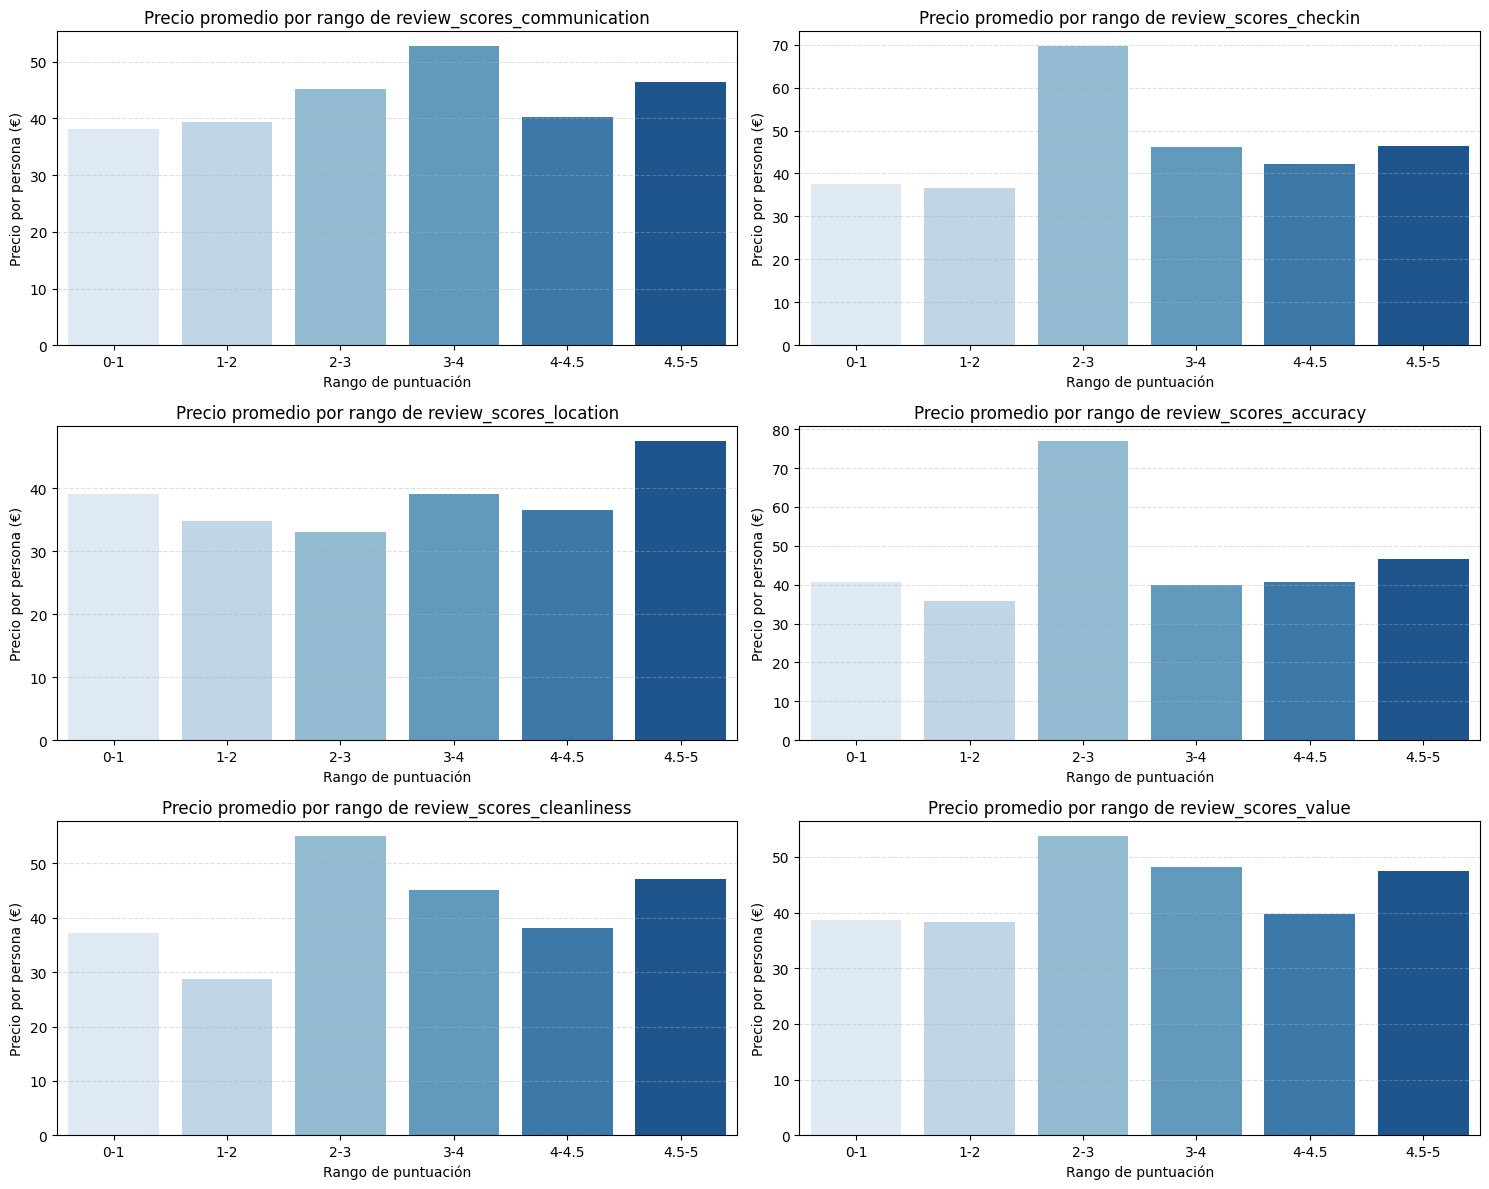

In [26]:
# Generamos los gráficos categóricos

plt.figure(figsize=(15, 12))

for i, col in enumerate(scores, 1):
    cat_col = f'{col}_grupo'
    
    plt.subplot(3, 2, i)
    sns.barplot(
        data=df,
        x=cat_col,
        y='price_person',
        estimator='mean',
        ci=None,
        palette='Blues'
    )
    
    plt.title(f'Precio promedio por rango de {col.replace("_iterative", "")}')
    plt.xlabel('Rango de puntuación')
    plt.ylabel('Precio por persona (€)')
    plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

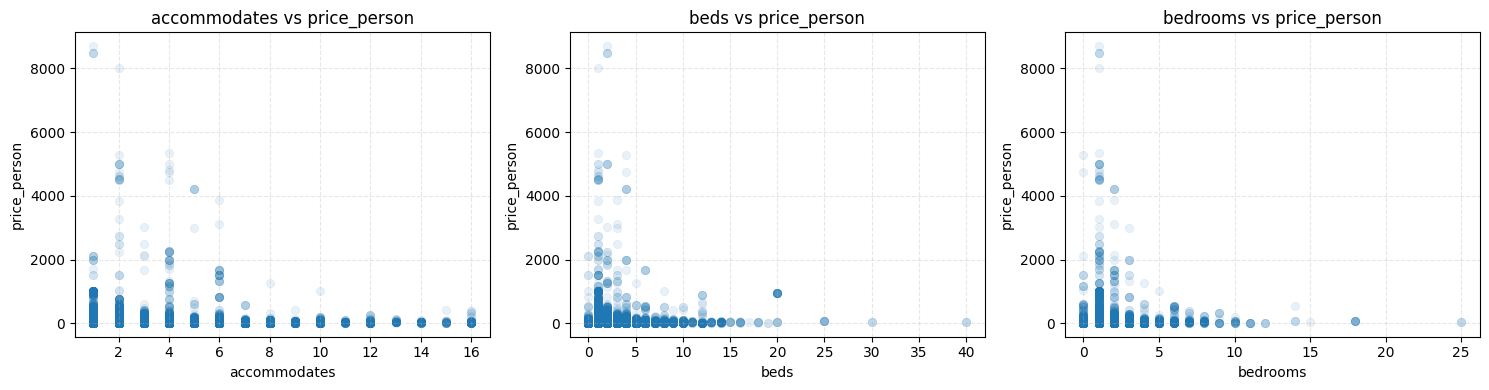

In [27]:
# Variables a graficar
vars_x = ['accommodates', 'beds', 'bedrooms']

# Usar sample si los datos son muy grandes (opcional)
df_plot = df.copy()
# df_plot = df_final.sample(10000, random_state=42)  # si es muy pesado

# Crear gráfico
plt.figure(figsize=(15, 4))

for i, var in enumerate(vars_x, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(
        data=df_plot,
        x=var,
        y='price_person',
        alpha=0.1,
        edgecolor=None
    )
    plt.title(f'{var} vs price_person')
    plt.xlabel(var)
    plt.ylabel('price_person')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [28]:
# 1. Crear ratios
df['bathrooms_per_guest'] = (df['bathrooms'] / df['accommodates']).round(2)
df['bedrooms_per_guest'] = (df['bedrooms'] / df['accommodates']).round(2)
df['beds_per_guest'] = (df['beds'] / df['accommodates']).round(2)

In [29]:
# 2. Categorizar con rangos personalizados

def cat_bath(ratio):
    if pd.isna(ratio):
        return "Sin datos"
    elif ratio < 0.2:
        return "< 0.2"
    elif ratio < 0.4:
        return "0.2–0.4"
    elif ratio < 0.6:
        return "0.4–0.6"
    elif ratio < 0.8:
        return "0.6–0.8"
    else:
        return "≥ 0.8"

def cat_bedroom(ratio):
    if pd.isna(ratio):
        return "Sin datos"
    elif ratio < 0.25:
        return "< 0.25"
    elif ratio < 0.5:
        return "0.25–0.5"
    elif ratio < 0.75:
        return "0.5–0.75"
    elif ratio < 1.0:
        return "0.75–1.0"
    else:
        return "≥ 1.0"

def cat_beds(ratio):
    if pd.isna(ratio):
        return "Sin datos"
    elif ratio < 0.5:
        return "< 0.5"
    elif ratio < 1.0:
        return "0.5–1.0"
    elif ratio < 1.5:
        return "1.0–1.5"
    else:
        return "≥ 1.5"


In [30]:
# 3. Aplicar categorización
df['baños_por_huésped_cat'] = pd.Categorical(df['bathrooms_per_guest'].apply(cat_bath),
    categories=["< 0.2", "0.2–0.4", "0.4–0.6", "0.6–0.8", "≥ 0.8", "Sin datos"], ordered=True)

df['habitaciones_por_huésped_cat'] = pd.Categorical(df['bedrooms_per_guest'].apply(cat_bedroom),
    categories=["< 0.25", "0.25–0.5", "0.5–0.75", "0.75–1.0", "≥ 1.0", "Sin datos"], ordered=True)

df['camas_por_huésped_cat'] = pd.Categorical(df['beds_per_guest'].apply(cat_beds),
    categories=["< 0.5", "0.5–1.0", "1.0–1.5", "≥ 1.5", "Sin datos"], ordered=True)

C:\Users\cargo\AppData\Local\Temp\ipykernel_17760\794982076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\cargo\AppData\Local\Temp\ipykernel_17760\794982076.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\cargo\AppData\Local\Temp\ipykernel_17760\794982076.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


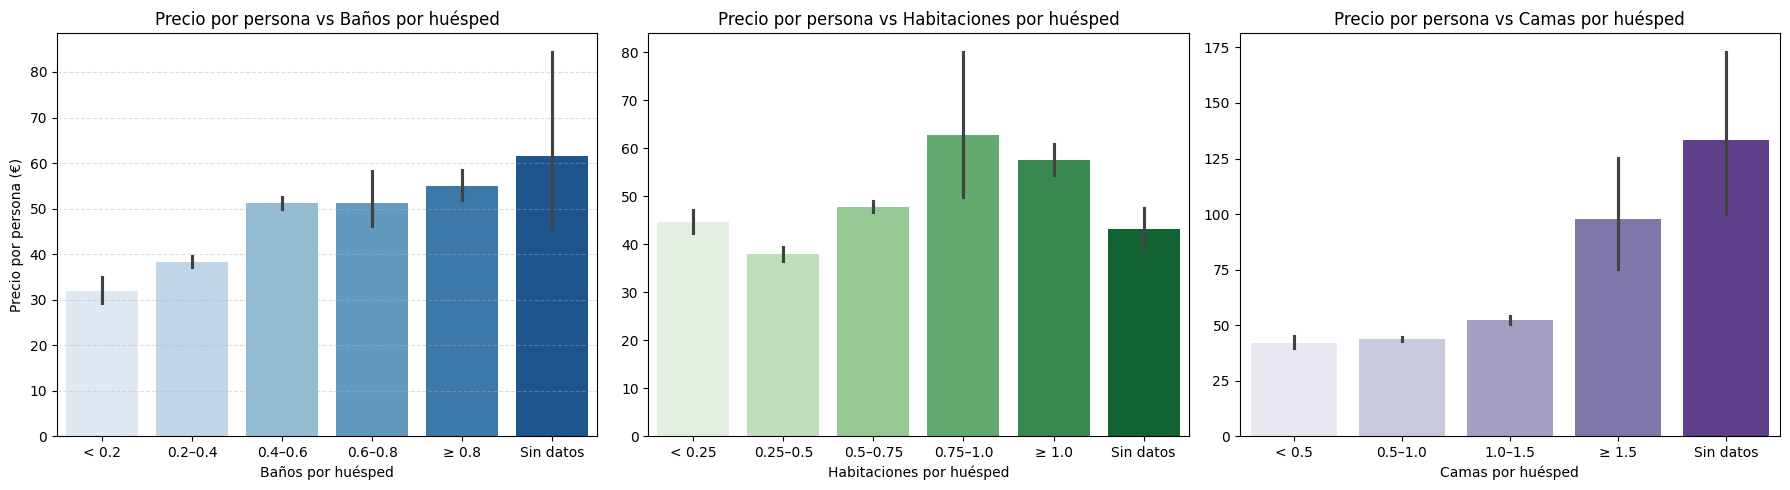

In [31]:
# 4. Crear gráficos de barras
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(
    data=df,
    x='baños_por_huésped_cat',
    y='price_person',
    estimator='mean',
    ax=axs[0],
    palette='Blues'
)
axs[0].set_title("Precio por persona vs Baños por huésped")
axs[0].set_xlabel("Baños por huésped")
axs[0].set_ylabel("Precio por persona (€)")
axs[0].grid(axis='y', linestyle='--', alpha=0.4)

sns.barplot(
    data=df,
    x='habitaciones_por_huésped_cat',
    y='price_person',
    estimator='mean',
    ax=axs[1],
    palette='Greens'
)
axs[1].set_title("Precio por persona vs Habitaciones por huésped")
axs[1].set_xlabel("Habitaciones por huésped")
axs[1].set_ylabel("")

sns.barplot(
    data=df,
    x='camas_por_huésped_cat',
    y='price_person',
    estimator='mean',
    ax=axs[2],
    palette='Purples'
)
axs[2].set_title("Precio por persona vs Camas por huésped")
axs[2].set_xlabel("Camas por huésped")
axs[2].set_ylabel("")

plt.tight_layout()
plt.show()

In [32]:
df.to_csv('../data/data_dashboard.csv', index=False)